## My Musical Journey

Our beloved spotify provided us with a 2010s decade end by  wrapping up one’s listening history throughout the year - in my case this meant from 2016 to 2019.

Formally known as Spotify Wrapped (https://open.spotify.com/genre/2019-page)

These insights have ignited my curiosity to explore beyond my liked and disliked songs, as well as what Spotify showed to us. 

So I decided to play around with the data of tracks that made to the top global list in 2016, 2017, 2018, 2019. Overall I thought it was very interesting to try to justify the numbers and results with song knowledge and intuituion.

In [1]:
#necessary libraries 

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
%matplotlib inline
import plotly.express as px

import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from IPython.display import display, Image, SVG, Math, YouTubeVideo


In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('../data/top_year.csv')
data

id                            title    main_artist  \
0    7gARZ2i5u5DHC1b1n1fML5                     Breezeblocks          alt-J   
1    0LPNhjjjg432PrqsDUcLjs                  Sleep by Rivers  Kyle Lionhart   
2    1xCkZYGKDv7ELjSlIKedOy                       No Diggity     Chet Faker   
3    1lzr43nnXAijIGYnCT8M8H                     It Wasn't Me        Rik Rok   
4    7iL6o9tox1zgHpKUfh9vuC                       In Da Club        50 Cent   
..                      ...                              ...            ...   
396  3A1NvmCEELpPD1mBotXokL                        Butterfly    Xavier Rudd   
397  3HNKZy1An5Jlnb02lcV2yd                  Southern Nights        Whitney   
398  2om86fvyOE6GGtubpMkZpC          Gi' mig Danmark tilbage        Natasja   
399  0mt02gJ425Xjm7c3jYkOBn  Lust For Life (with The Weeknd)     The Weeknd   
400  49sqQIS868rKIy5NBUmJV6                         The Heat         Jungle   

     danceability  energy  key  loudness  mode  acousticness  \
0           0.569   0.645    5    -7.368     1        0.1180   
1           0.639   0.361    9   -13.296     1        0.6700   
2           0.672   0.506    2   -12.013     0        0.5890   
3           0.853   0.606    0    -4.596     1        0.0561   
4           0.899   0.713    6    -2.752     0        0.2550   
..            ...     ...  ...       ...   ...           ...   
396         0.563   0.313    0   -14.509     1        0.8760   
397         0.568   0.295    7    -7.867     0        0.9930   
398         0.782   0.812   11    -2.185     0        0.0270   
399         0.504   0.655    0    -8.644     0        0.6040   
400         0.649   0.878    5    -7.754     0        0.2770   

     instrumentalness  liveness  valence    tempo  duration_ms  \
0            0.001140    0.1460    0.247   74.985       227080   
1            0.000333    0.1210    0.407   86.530       241023   
2            0.000024    0.0925    0.500   79.974       225000   
3            0.000000    0.3130    0.654   94.759       227600   
4            0.000000    0.0708    0.777   90.051       193467   
..                ...       ...      ...      ...          ...   
396          0.139000    0.3980    0.325  120.282       130216   
397          0.499000    0.1400    0.430   84.225       212622   
398          0.000000    0.0810    0.772   80.030       213293   
399          0.001930    0.3640    0.262   99.982       264066   
400          0.154000    0.4240    0.645  109.984       196053   

     time_signature  Year  
0                 4  2016  
1                 4  2016  
2                 4  2016  
3                 4  2016  
4                 4  2016  
..              ...   ...  
396               4  2019  
397               4  2019  
398               4  2019  
399               4  2019  
400               4  2019  

[401 rows x 16 columns]

In [3]:
data.dtypes

id                   object
title                object
main_artist          object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
Year                  int64
dtype: object

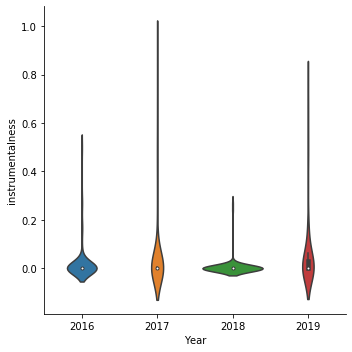

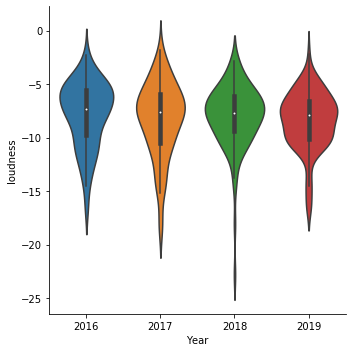

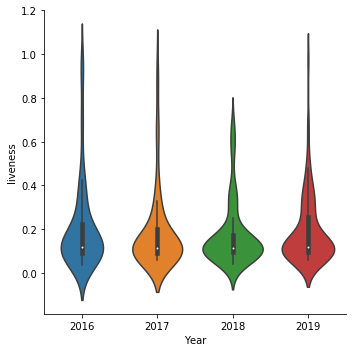

In [4]:
sb.catplot(x = 'Year', y = 'instrumentalness', data = data, kind = 'violin')
sb.catplot(x = 'Year', y = 'loudness', data = data, kind = 'violin')
sb.catplot(x = 'Year', y = 'liveness', data = data, kind = 'violin')

## Whole Picture Comparison

Unlike the ones above, let’s do another type of comparison for the other features. 

- Due to the fact that the features have varying range, I needed to rescale the values to a relatively similar range using min-max scaler. 
- That kind of scaler has an advantage over the standard scaler in terms of distortion in original data.

In [5]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']


In [6]:
from sklearn.preprocessing import MinMaxScaler
# Min-max scaling
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data[features]), 
                         columns=data[features].columns)




In [7]:
# KDE plot
fig = ff.create_distplot([df_scaled[c] for c in df_scaled.columns], 
                    df_scaled.columns, 
                    show_hist=False)

fig.show()

#Now all of the data is on ranging between 0 and 1;

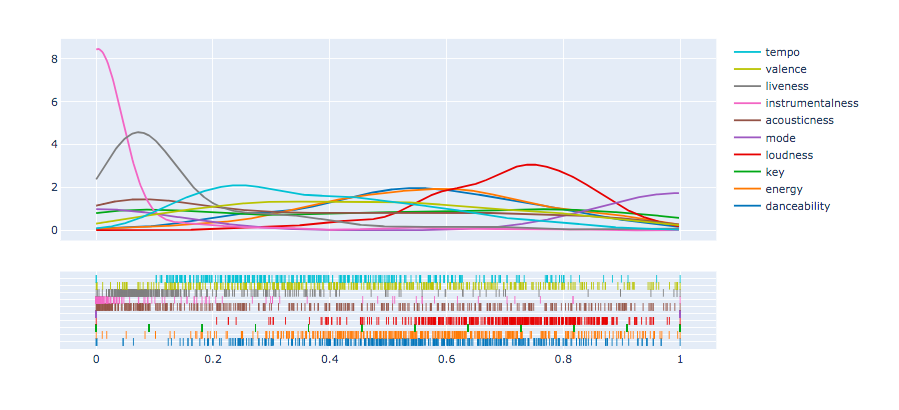

In [29]:
#because git doesn't load the graph above
Image(filename='../images/image3.png',width = 900)

In [9]:
df_scaled['Year'] = data['Year']
df_scaled.head()

danceability    energy       key  loudness  mode  acousticness  \
0      0.487805  0.656648  0.454545  0.734740   1.0      0.118809   
1      0.582656  0.360259  0.818182  0.452481   1.0      0.674715   
2      0.627371  0.511584  0.181818  0.513570   0.0      0.593142   
3      0.872629  0.615947  0.000000  0.866727   1.0      0.056471   
4      0.934959  0.727614  0.545455  0.954528   0.0      0.256778   

   instrumentalness  liveness   valence     tempo  Year  
0          0.001275  0.114140  0.226793  0.111927  2016  
1          0.000372  0.087521  0.399095  0.190618  2016  
2          0.000027  0.057176  0.499246  0.145932  2016  
3          0.000000  0.291951  0.665087  0.246708  2016  
4          0.000000  0.034072  0.797545  0.214618  2016

In [10]:
# Radar plot
df_radar = df_scaled.groupby('Year').mean().reset_index() \
                    .melt(id_vars='Year', var_name="features", value_name="avg") \
                    .sort_values(by=['Year','features']).reset_index(drop=True)

fig = px.line_polar(df_radar, 
              r="avg", 
              theta="features", 
              title='Mean Values of Each Track Features',
              color="Year", 
              line_close=True,
              line_shape='spline',
              range_r=[0, 0.8],
              color_discrete_sequence=px.colors.cyclical.mygbm[:-6])

fig.show()

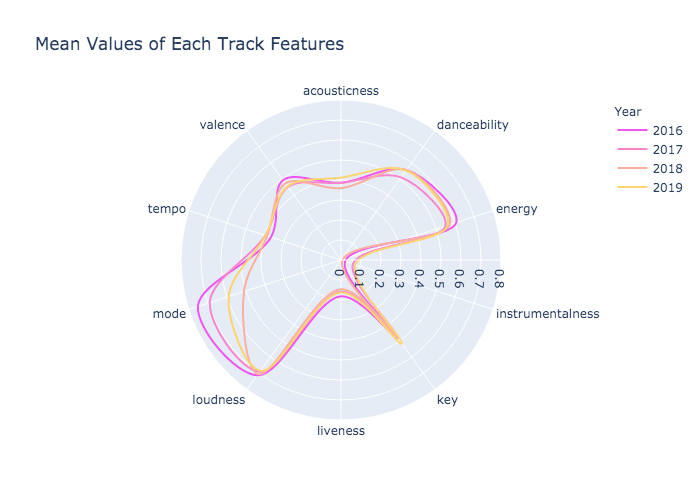

In [11]:
image_4 = fig.write_image("../images/image4.png")

#because git doesn't load the graph above
Image(filename='../images/image4.png',width = 800)

###### At a glance, there is seemingly no significant gap among the playlists. 

- Looking in closely, the tracks in 2019 are way more acoustic and with higher level of instrumentalness compared to the other editions. 
- 2016 has higher level of loudness and energy due to some rock and Eminem trackers there.
- According to Valence I was the happiest in 2016 and the saddest in 2017.
- Mode feature tell us that on average I liked songs with major modes in 2016 vs minor in 2018 and 2019.

### PCA 

Principal Component Analysis (PCA) is one of the most common linear dimensionality reduction techniques. It emphasizes variation and brings out strong patterns in a dataset.

- The explained variance ratios after projection are 35%, 21%, 15% for PC1, PC2, PC3 respectively. Then I took the absolute value of the eigenvectors for each projection space relative to each original feature. 

- The result was acousticness has the most weights in forming the second principal component.

In [12]:
# Transform
pca = PCA(n_components=3, random_state=42)
df_pca = pd.DataFrame(data=pca.fit_transform(df_scaled.iloc[:,:-1]), columns=['PC1','PC2','PC3'])

In [13]:
# Inspect eigenvectors and eigenvalues
pca.components_
pca.explained_variance_ratio_

array([0.35457065, 0.20716026, 0.15026961])

Text(0, 0.5, 'Principal components')

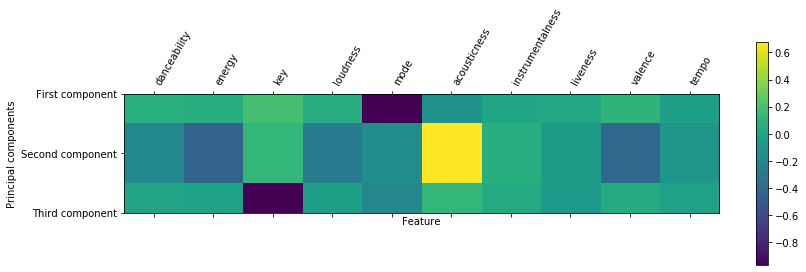

In [14]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(data[features].columns)),data[features], rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [15]:
df_pca_fix = df_pca.merge(data, left_index=True, right_index=True)
df_pca_fix = df_pca_fix[['PC1', 'PC2', 'PC3', 'title', 'main_artist', 'acousticness']]

df_pca_fix.head()

PC1       PC2       PC3            title    main_artist  acousticness
0 -0.336165 -0.156745 -0.083425     Breezeblocks          alt-J        0.1180
1 -0.351119  0.379656 -0.344514  Sleep by Rivers  Kyle Lionhart        0.6700
2  0.529271  0.284593  0.466683       No Diggity     Chet Faker        0.5890
3 -0.334592 -0.553810  0.347416     It Wasn't Me        Rik Rok        0.0561
4  0.732069 -0.304404  0.068896       In Da Club        50 Cent        0.2550

In [16]:
# Plot the PCA
px.scatter_3d(df_pca_fix, 
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    title='Principal Component Analysis Projection (3-D)',
                    color='acousticness', 
                    size=np.ones(len(df_pca_fix)), 
                    size_max=5,
                    height=600,
                    hover_name='title',
                    hover_data=['main_artist'],
                    color_continuous_scale=px.colors.cyclical.mygbm[:-6])

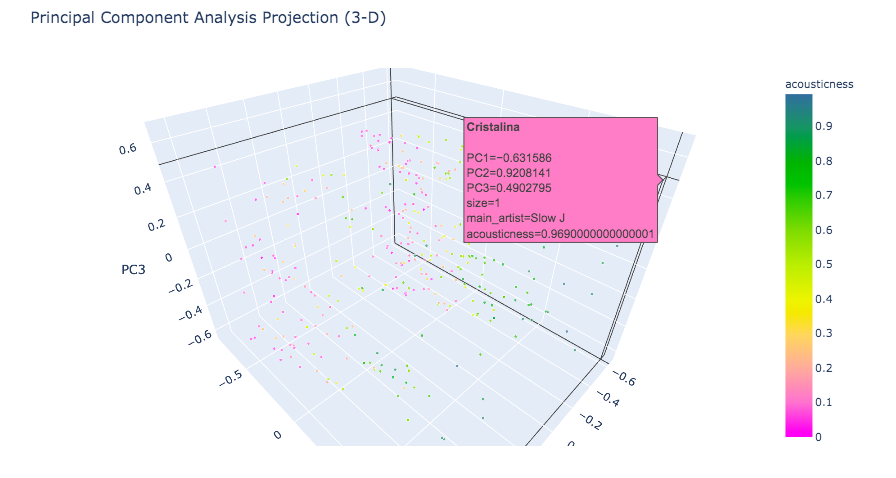

In [17]:
#because the 3D graph above doesn't load on git:

Image(filename='../images/newplot.png',width = 800)

#### There we can see each song position and its distance to other songs based on the audio features that have been transformed. 

- Most points are concentrated on the green-ish area and others on a pink one.

- The mapping also confirms that acousticness does correlate with PC2 to some extent. 

- Salvador Sobral, Rubel and Tim Bernardes are on the opposite side to the way way less acoustic level with Shakira's famous world cup Waka Waka (what happened to me in 2016) 


In [18]:
data[data['Year']==2019].sort_values(by="acousticness", ascending=False).head(10)

id  \
397  3HNKZy1An5Jlnb02lcV2yd   
307  1PfUKiMDKIlPEF9FfdJawc   
369  60XsYJvosWIES45lrR72pB   
327  5GbVzc6Ex5LYlLJqzRQhuy   
388  7AluhhfZ0AO0Zw8MoUstzN   
363  7ADcBtMDWTDWAUyR3IFquc   
314  76bcaYeKOKTrj9lEc9BZFU   
395  4OoVWF7lPUyq7yQgl1icvv   
308  3vgiIJW3iSQRRvgYiW86i9   
312  2Sfl7odHUmG7qc8SbqUyzE   

                                                 title         main_artist  \
397                                    Southern Nights             Whitney   
307  hope is a dangerous thing for a woman like me ...        Lana Del Rey   
369                                          Recomeçar       Tim Bernardes   
327                                    Mystery of Love      Sufjan Stevens   
388                                       Venice Bitch        Lana Del Rey   
363                                              Polly             Whitney   
314                         Quando Bate Aquela Saudade               Rubel   
395                                             Me n U  Trombone de Frutas   
308                                             Brillo             ROSALÍA   
312                      DI MI NOMBRE - Cap.8: Éxtasis             ROSALÍA   

     danceability  energy  key  loudness  mode  acousticness  \
397         0.568   0.295    7    -7.867     0         0.993   
307         0.492   0.144    7   -10.125     1         0.965   
369         0.315   0.181    0   -10.321     1         0.944   
327         0.365   0.273    4   -16.526     0         0.940   
388         0.388   0.296    9   -13.040     0         0.916   
363         0.565   0.306    2    -6.797     1         0.910   
314         0.550   0.314    7   -14.133     1         0.895   
395         0.432   0.254    0   -10.855     1         0.894   
308         0.535   0.384    9   -10.049     0         0.890   
312         0.794   0.534    8    -6.470     0         0.885   

     instrumentalness  liveness  valence    tempo  duration_ms  \
397          0.499000    0.1400    0.430   84.225       212622   
307          0.000002    0.1610    0.274  164.839       324302   
369          0.000082    0.0821    0.152  100.737       235443   
327          0.431000    0.1090    0.238  132.285       248960   
388          0.267000    0.1050    0.294   78.785       576346   
363          0.101000    0.3120    0.247   77.181       206027   
314          0.010700    0.1880    0.595   90.088       394707   
395          0.585000    0.1050    0.157  110.763       237540   
308          0.000000    0.0964    0.767  145.947       159573   
312          0.000052    0.3140    0.547   91.871       162377   

     time_signature  Year  
397               4  2019  
307               3  2019  
369               3  2019  
327               5  2019  
388               4  2019  
363               4  2019  
314               4  2019  
395               4  2019  
308               4  2019  
312               4  2019

In [19]:
data[data['Year']==2016].sort_values(by="loudness", ascending=False).head(10)

id                                     title  \
24  2PpruBYCo4H7WOBJ7Q2EwM                                   Hey Ya!   
4   7iL6o9tox1zgHpKUfh9vuC                                In Da Club   
61  6YZdkObH88npeKrrkb8Ggf            DUELE EL CORAZON (feat. Wisin)   
46  1vcxF91pWs9uNwDROuiCPB                                    Savior   
92  6aPhlSE4dI6COrgzIpGOQp              Down in New Orleans (Finale)   
25  1MYlx4dBtiyjn7K8YSyfzT                       The Real Slim Shady   
87  579eDlIhaT8j0txv8H6aOS                       Dig a Little Deeper   
12  126TblwXGNTUZ7RPMnThkU                            Left Hand Free   
67  27PmvZoffODNFW2p7ehZTQ                                Don't Mind   
86  7w9bgPAmPTtrkt2v16QWvQ  Lose Yourself - From "8 Mile" Soundtrack   

              main_artist  danceability  energy  key  loudness  mode  \
24                OutKast         0.728   0.974    4    -2.261     0   
4                 50 Cent         0.899   0.713    6    -2.752     0   
61                  Wisin         0.724   0.904    8    -3.354     0   
46           Rise Against         0.554   0.932    5    -3.424     0   
92        Anika Noni Rose         0.575   0.817    0    -3.636     1   
25                 Eminem         0.947   0.655    5    -4.243     0   
87  Pinnacle Gospel Choir         0.715   0.820    0    -4.249     1   
12                  alt-J         0.698   0.876    3    -4.450     1   
67             Kent Jones         0.464   0.771    8    -4.503     1   
86                 Eminem         0.701   0.728    2    -4.554     1   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
24       0.10300          0.000532    0.1750   0.9650   79.526       235213   
4        0.25500          0.000000    0.0708   0.7770   90.051       193467   
61       0.07860          0.000000    0.2260   0.8460   90.999       200813   
46       0.00154          0.000142    0.4250   0.4780  112.490       242280   
92       0.50400          0.000335    0.1360   0.7960  147.894        97693   
25       0.03310          0.000000    0.0433   0.7870  104.485       284800   
87       0.34900          0.000005    0.1160   0.7980   98.001       167933   
12       0.45200          0.013300    0.0824   0.8100  101.992       173631   
67       0.02350          0.000000    0.0630   0.6900  158.777       198237   
86       0.00971          0.001150    0.3610   0.0591  171.388       326467   

    time_signature  Year  
24               4  2016  
4                4  2016  
61               4  2016  
46               4  2016  
92               4  2016  
25               4  2016  
87               4  2016  
12               4  2016  
67               4  2016  
86               4  2016

In [20]:
data[data['Year']==2019].sort_values(by="instrumentalness", ascending=False).head(10)

id            title         main_artist  \
336  3oSnMDaL0WsWyp2Gy80ulq        Blackbird   Fat Freddy's Drop   
378  6QpZXzHcOgXK41Y3YCx203      Little Lies                ODIE   
306  5TBsLU9TSxjDLzMpsEgJsv          Drinkee         Sofi Tukker   
395  4OoVWF7lPUyq7yQgl1icvv           Me n U  Trombone de Frutas   
348  6ElSiKL8Pj6ly2gxYNGAQ8        Artemísia          Carne Doce   
397  3HNKZy1An5Jlnb02lcV2yd  Southern Nights             Whitney   
360  1DohFoARZHxECacSWRYyjT   Fortune Teller         Xavier Rudd   
327  5GbVzc6Ex5LYlLJqzRQhuy  Mystery of Love      Sufjan Stevens   
388  7AluhhfZ0AO0Zw8MoUstzN     Venice Bitch        Lana Del Rey   
345  0fIFjeeLJjIBliWUCsxyMF  Teenage Fantasy         Jorja Smith   

     danceability  energy  key  loudness  mode  acousticness  \
336         0.720   0.791    7    -6.902     0        0.0377   
378         0.340   0.294    2   -15.989     1        0.5930   
306         0.771   0.690    2    -7.595     1        0.0492   
395         0.432   0.254    0   -10.855     1        0.8940   
348         0.707   0.600    4    -7.384     1        0.1080   
397         0.568   0.295    7    -7.867     0        0.9930   
360         0.600   0.608   11    -9.378     0        0.5210   
327         0.365   0.273    4   -16.526     0        0.9400   
388         0.388   0.296    9   -13.040     0        0.9160   
345         0.583   0.677    4   -10.210     0        0.4700   

     instrumentalness  liveness  valence    tempo  duration_ms  \
336             0.730    0.5040    0.535   95.010       567459   
378             0.680    0.0944    0.136   83.938       220008   
306             0.629    0.1340    0.346  115.009       299294   
395             0.585    0.1050    0.157  110.763       237540   
348             0.518    0.1030    0.349  112.033       252347   
397             0.499    0.1400    0.430   84.225       212622   
360             0.454    0.6280    0.571  122.175       207093   
327             0.431    0.1090    0.238  132.285       248960   
388             0.267    0.1050    0.294   78.785       576346   
345             0.193    0.4300    0.495  176.119       226906   

     time_signature  Year  
336               4  2019  
378               4  2019  
306               4  2019  
395               4  2019  
348               4  2019  
397               4  2019  
360               4  2019  
327               5  2019  
388               4  2019  
345               4  2019

### LA ROSALÍA. TRA TRA.

Every year is marked by a specific artist (e.g. 2018 - Frank Ocean).

2019 was the year I discovered the Catalan Phenomenon - Rosalía - a singer with strong Flamengo basis that doesn't fear to explore with Pop, Trap, hip hop, etc. Her music is known as very experimental. Should be interesting to check the features on the songs I heard more during 2019:

In [21]:
data[data['main_artist']== 'ROSALÍA'].mean()

#I would expect Rosalía to have higher level of instrumentalness
#The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

danceability             0.688250
energy                   0.545750
key                      6.250000
loudness                -7.191875
mode                     0.250000
acousticness             0.602812
instrumentalness         0.019161
liveness                 0.201125
valence                  0.519250
tempo                  120.397250
duration_ms         184595.750000
time_signature           3.750000
Year                  2019.000000
dtype: float64

In [22]:
data.mean()

danceability             0.610491
energy                   0.563565
key                      5.316708
loudness                -8.130638
mode                     0.635910
acousticness             0.382978
instrumentalness         0.037271
liveness                 0.190600
valence                  0.471183
tempo                  115.391870
duration_ms         237949.860349
time_signature           3.907731
Year                  2017.496259
dtype: float64

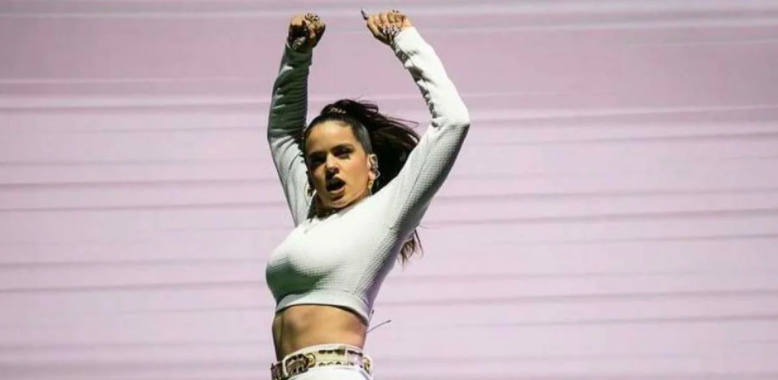

In [23]:
Image(filename='../images/Rosalía.png')

### From the land of Oz. Tash Sultana.

Let's analyse other of my absolutely favourite artists - a one woman show - Tash Sultana.

https://www.youtube.com/watch?v=bWgWKdqoJmo

In [24]:
data[data['main_artist']== 'Tash Sultana'].mean()

#lower level of danceability - makes sense
#low acousticness - she's know to be an artist in eletric guitar

#super low level of instrumentalness - weird - she doen't sing in most part of the songs

danceability             0.531455
energy                   0.615000
key                      5.090909
loudness                -6.475636
mode                     0.181818
acousticness             0.225336
instrumentalness         0.005399
liveness                 0.114600
valence                  0.375636
tempo                  124.238909
duration_ms         273980.727273
time_signature           4.000000
Year                  2018.636364
dtype: float64

In [25]:
data.mean()

danceability             0.610491
energy                   0.563565
key                      5.316708
loudness                -8.130638
mode                     0.635910
acousticness             0.382978
instrumentalness         0.037271
liveness                 0.190600
valence                  0.471183
tempo                  115.391870
duration_ms         237949.860349
time_signature           3.907731
Year                  2017.496259
dtype: float64